# 4. 코로나 바이러스의 영향으로 중국인 관광객이 얼마나 줄었을까?

In [3]:
import pandas as pd
FILE_PATH = './datasalon-master/02_개정판/4_Tourists_Event/files/'

In [6]:
kto_201901 = pd.read_excel(FILE_PATH + 'kto_201901.xlsx', header = 1, usecols= 'A:G', skipfooter=4)
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


In [7]:
kto_201901.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526
66,교포,0,0,0,0,15526,15526


In [8]:
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
국적       67 non-null object
관광       67 non-null int64
상용       67 non-null int64
공용       67 non-null int64
유학/연수    67 non-null int64
기타       67 non-null int64
계        67 non-null int64
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [9]:
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [10]:
condition = (kto_201901['관광'] == 0)\
            | (kto_201901['상용'] == 0)\
            | (kto_201901['공용'] == 0)\
            | (kto_201901['유학/연수'] == 0)
kto_201901[condition]

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [11]:
kto_201901['기준년월'] = '2019-01'
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01


In [15]:
kto_201901['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [27]:
continents_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
continents_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [28]:
condition = (kto_201901.국적.isin(continents_list) == False)
kto_201901_country = kto_201901[condition]
kto_201901_country['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [29]:
kto_201901_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01


In [30]:
kto_201901_country_newindex = kto_201901_country.reset_index(drop = True) #인덱스 초기화, drop=True 쓰지 않으면, 기존 인덱스 값 두고 새로운 컬럼 생성
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


In [26]:
continents = ['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 + ['아프리카'] * 2 + ['기타대륙'] + ['교포']
print(continents)

['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타대륙', '교포']
60


In [31]:
kto_201901_country_newindex['대륙'] = continents
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아


In [32]:
kto_201901_country_newindex.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아
56,남아프리카공화국,368,9,1,6,616,1000,2019-01,아프리카
57,아프리카 기타,768,718,90,206,908,2690,2019-01,아프리카
58,국적미상,33,4,0,1,16,54,2019-01,기타대륙
59,교포,0,0,0,0,15526,15526,2019-01,교포


In [33]:
kto_201901_country_newindex['관광객비율(%)'] = \
    round(kto_201901_country_newindex['관광'] / kto_201901_country_newindex['계'] * 100, 1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3


In [34]:
kto_201901_country_newindex.sort_values(by='관광객비율(%)', ascending=False).head() #내림차순

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4


In [35]:
kto_201901_country_newindex.sort_values(by='관광객비율(%)', ascending=True).head() #오름차순 

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
59,교포,0,0,0,0,15526,15526,2019-01,교포,0.0
14,방글라데시,149,126,27,97,848,1247,2019-01,아시아,11.9
12,스리랑카,157,54,5,28,1043,1287,2019-01,아시아,12.2
13,파키스탄,238,178,10,193,413,1032,2019-01,아시아,23.1
15,캄보디아,635,39,55,51,1915,2695,2019-01,아시아,23.6


In [36]:
kto_201901_country_newindex.pivot_table(values='관광객비율(%)', index='대륙', aggfunc='mean')

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,61.100000
아메리카,68.200000
아시아,59.624000
아프리카,32.700000
오세아니아,84.833333
유럽,63.826087


In [37]:
condition = (kto_201901_country_newindex['국적'] == '중국')
kto_201901_country_newindex[condition]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5


In [38]:
tourist_sum = sum(kto_201901_country_newindex['관광'])
tourist_sum

884293

In [39]:
kto_201901_country_newindex['전체비율(%)'] = \
    round(kto_201901_country_newindex['관광'] / tourist_sum *100, 1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5,0.3
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8


In [40]:
kto_201901_country_newindex.sort_values('전체비율(%)', ascending=False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5,36.2
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.5,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9


In [43]:
# 데이터 전처리 과정을 함수화 
def create_kto_data(yy, mm):
    #1. 불러올 엑셀 파일 경로 지정
    file_path = FILE_PATH + 'kto_{}{}.xlsx'.format(yy, mm)
    
    #2. 엑셀 파일 불러오기
    df = pd.read_excel(file_path, header = 1, usecols= 'A:G', skipfooter=4)
    
    #3. "기준년월" 컬럼 추가
    df['기준년월'] = '{}-{}'.format(yy, mm)
    
    #4. "국적" 컬럼에서 대륙 제거하고 국가만 남기기
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계'] # 제거할 대륙명 선정
    condition = (df['국적'].isin(ignore_list) == False) # 대륙 미포함 조건
    df_country = df[condition].reset_index(drop=True)
    
    #5. "대륙" 컬럼 추가
    continents = ['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 + ['아프리카'] * 2 + ['기타대륙'] + ['교포']
    df_country['대륙'] = continents
    
    #6. 국가별 "관광객비율(%)" 컬럼 추가
    df_country['관광객비율(%)'] = round(df_country.관광 / df_country.계 * 100, 1)
    
    #7. "전체비율(%)" 컬럼 추가
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country['관광'] / tourist_sum * 100, 1)
    
    #8. 결과 출력
    return(df_country)

In [44]:
kto_test = create_kto_data(2018, 12)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,252461,1698,161,608,3593,258521,2018-12,아시아,97.7,22.7
1,대만,85697,71,22,266,1252,87308,2018-12,아시아,98.2,7.7
2,홍콩,58355,41,3,208,939,59546,2018-12,아시아,98.0,5.2
3,마카오,6766,0,1,20,36,6823,2018-12,아시아,99.2,0.6
4,태국,47242,42,302,58,6382,54026,2018-12,아시아,87.4,4.2


In [46]:
for yy in range(2010, 2021):
    for mm in range(1, 13):
        mm_str = str(mm).zfill(2) # 0을 포함한 2자리 출력
        yymm = '{}{}'.format(yy, mm_str)
        print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012


In [55]:
df = pd.DataFrame() # 데이터를 하나로 통합할 공간 만들기

In [56]:
for yy in range(2010, 2021):
    for mm in range(1, 13):
        try:
            temp = create_kto_data(str(yy), str(mm).zfill(2))
            df = df.append(temp, ignore_index=True)
        except:
            pass

In [57]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [58]:
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,20.0,0.0
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,3.4,0.0
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2.3,0.0
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,25.0,0.0
7499,교포,0,0,0,0,790,790,2020-05,교포,0.0,0.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
국적          7500 non-null object
관광          7500 non-null int64
상용          7500 non-null int64
공용          7500 non-null int64
유학/연수       7500 non-null int64
기타          7500 non-null int64
계           7500 non-null int64
기준년월        7500 non-null object
대륙          7500 non-null object
관광객비율(%)    7500 non-null float64
전체비율(%)     7500 non-null float64
dtypes: float64(2), int64(6), object(3)
memory usage: 644.7+ KB


In [60]:
df.to_excel('./datasalon-master/02_개정판/4_Tourists_Event/practice/kto_total.xlsx', index=False)

In [61]:
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


In [62]:
file_path = './datasalon-master/02_개정판/4_Tourists_Event/practice/[국적별 관광객 데이터] 중국.xlsx'
df_filter.to_excel(file_path, index=False)

In [63]:
cntry_list = df['국적'].unique()
cntry_list

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [64]:
len(cntry_list)

60

In [65]:
for cntry in cntry_list:
    # 국적으로 필터링
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    # 국적명을 반영한 파일명 만들기
    file_path = './datasalon-master/02_개정판/4_Tourists_Event/practice/[국적별 관광객 데이터] {}.xlsx'.format(cntry)
    
    # 파일명으로 저장
    df_filter.to_excel(file_path, index=False)

In [66]:
df = pd.read_excel('./datasalon-master/02_개정판/4_Tourists_Event/practice/kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [67]:
from matplotlib import font_manager, rc
import platform

# 그래프에서 한글 표기하기 위한 글꼴 변경 (by OS)
if platform.system() == 'Windows':
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    print('Check your OS system')

In [68]:
# 가장 기본적인 시각화 라이브러리 - matplotlib
import matplotlib.pyplot as plt

In [69]:
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


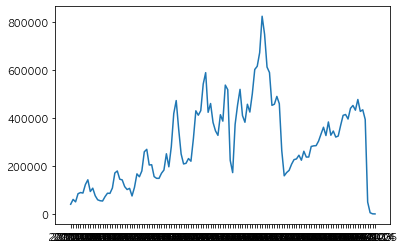

In [70]:
# 시계열 그래프 그리기
plt.plot(df_filter['기준년월'], df_filter['관광']) # 각각 X, Y축 기준
plt.show()

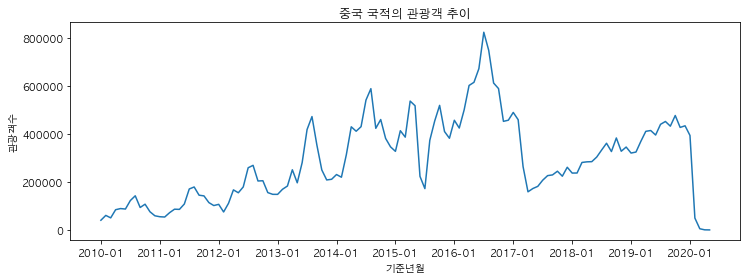

In [71]:
# 그래프 크기 조절 
plt.figure(figsize=(12, 4)) # 가로 12인치 x 세로 4인치

# 그래프 내용 설정
plt.plot(df_filter['기준년월'], df_filter['관광'])

# 그래프 타이틀, X축, Y축 이름 달기
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

# X축 눈금값 설정
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

# 그래프 표현
plt.show()

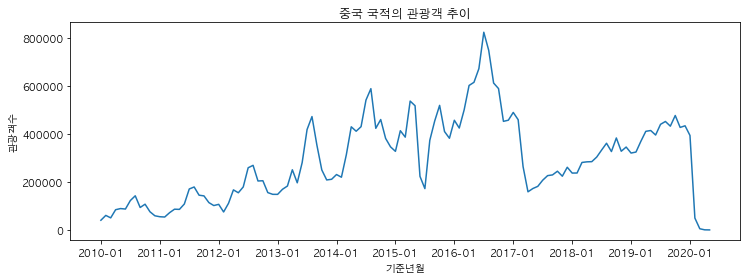

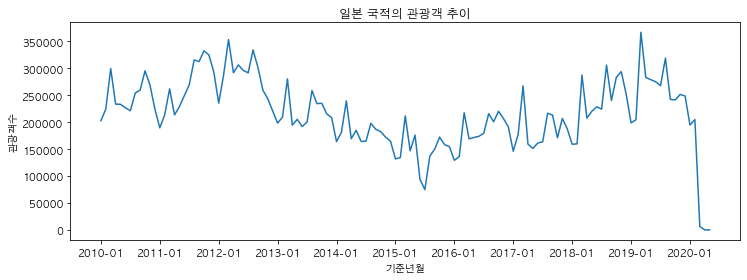

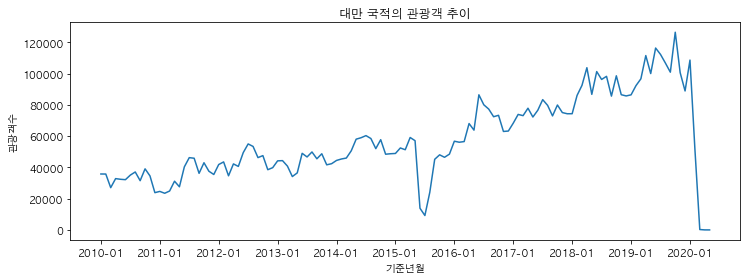

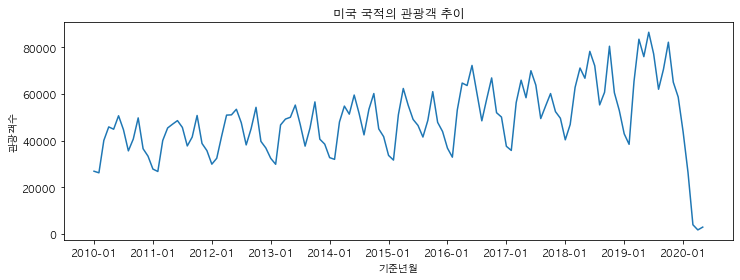

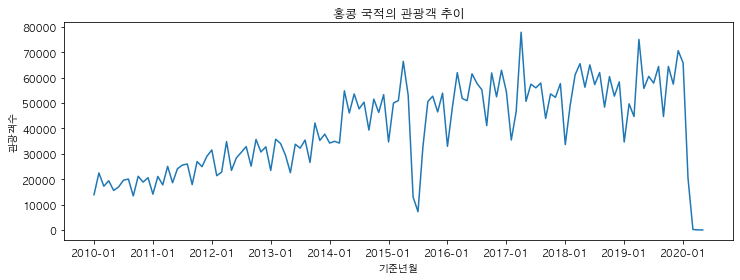

In [72]:
cntry_list = ['중국', '일본', '대만', '미국', '홍콩']
for cntry in cntry_list:
    # 국적 관광객만 추출
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    plt.figure(figsize=(12, 4))

    plt.plot(df_filter['기준년월'], df_filter['관광'])
    
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')

    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

    plt.show()

In [73]:
df['년도'] = df['기준년월'].str.slice(0, 4) # 문자열 자르기
df['월'] = df['기준년월'].str.slice(5, 7)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [74]:
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


In [75]:
df_pivot = df_filter.pivot_table(values='관광', index='년도', columns='월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [76]:
# 히트맵 그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns # matplotlib에 종속되기 때문에 항상 matplotlib도 함께 인포트!

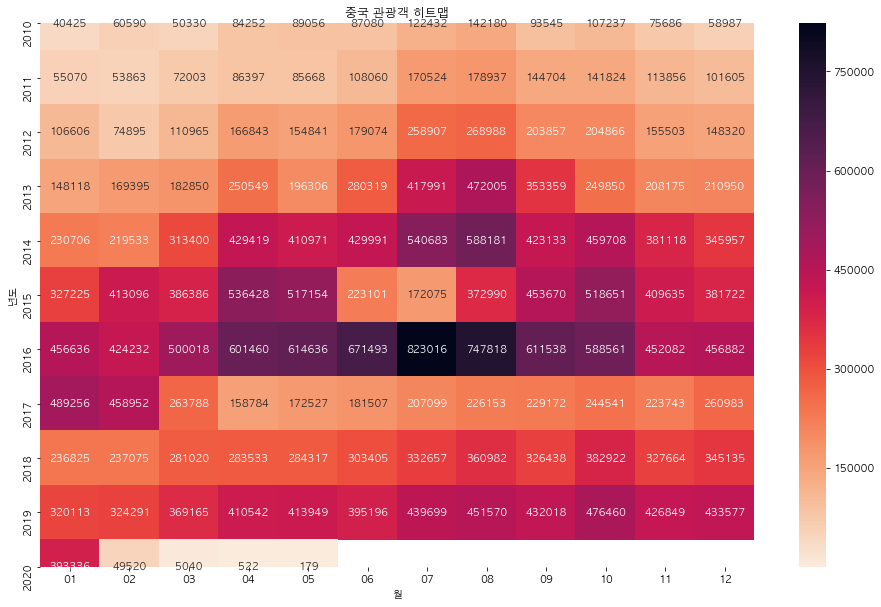

In [78]:
# 그래프 크기 설정
plt.figure(figsize=(16,10))

# 히트맵 그래프 그리기
sns.heatmap(df_pivot, annot= True, fmt='.0f', cmap='rocket_r')

# 그래프 타이틀
plt.title('중국 관광객 히트맵')

# 그래프 표현
plt.show()

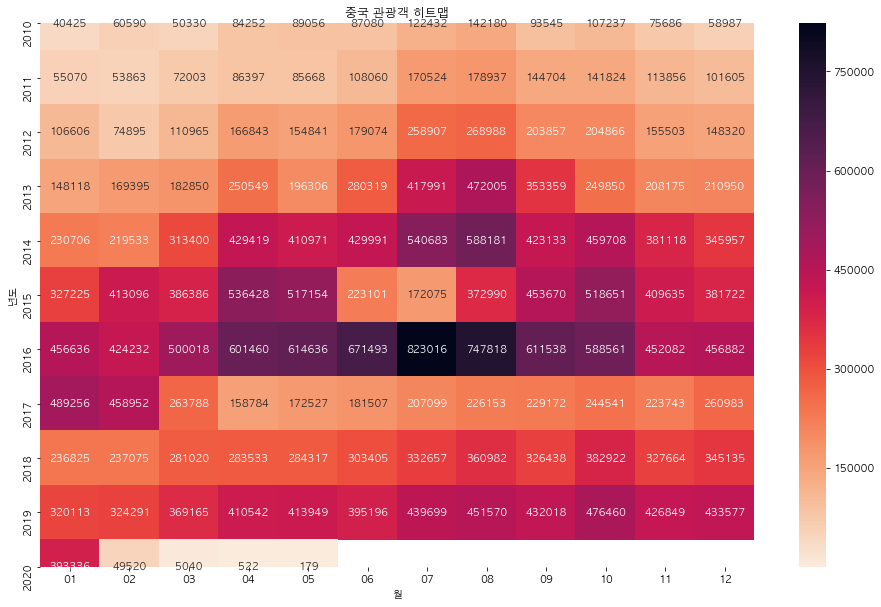

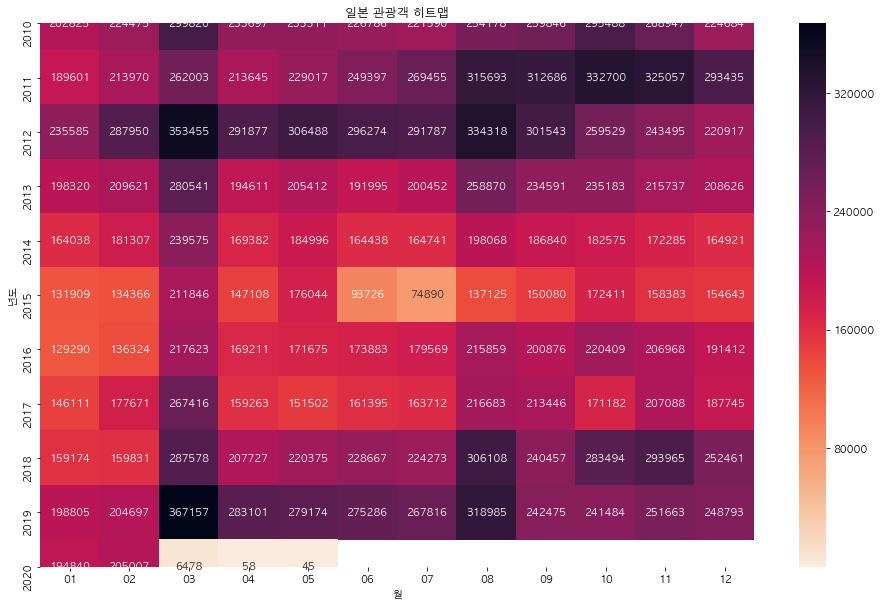

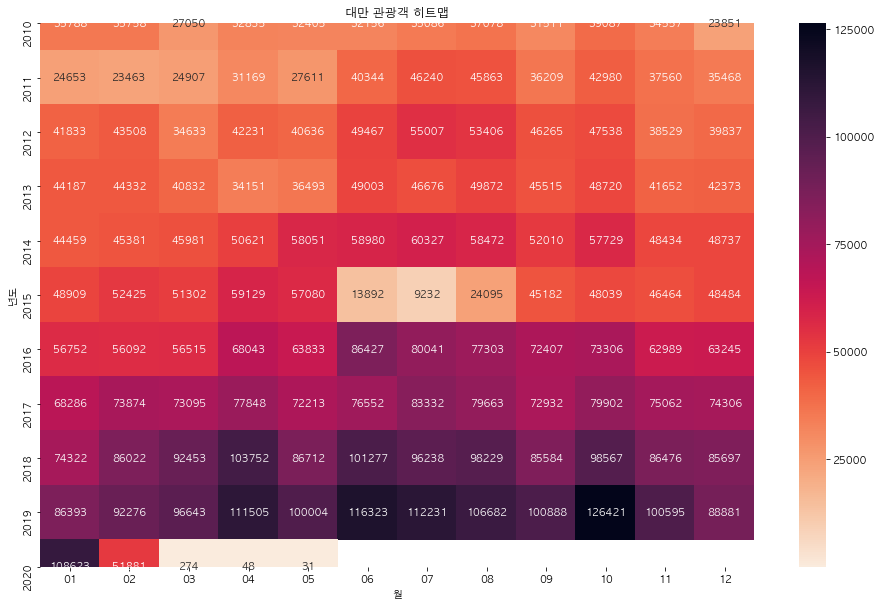

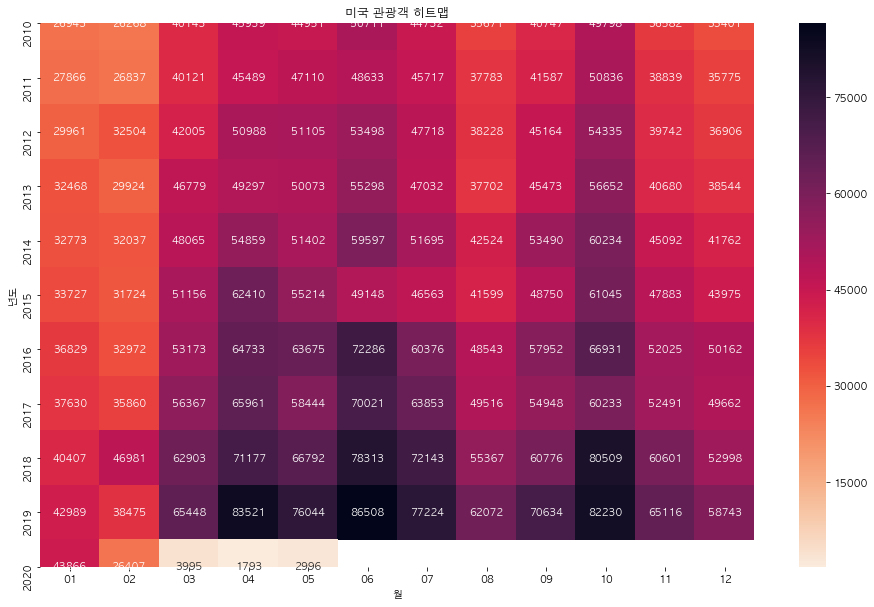

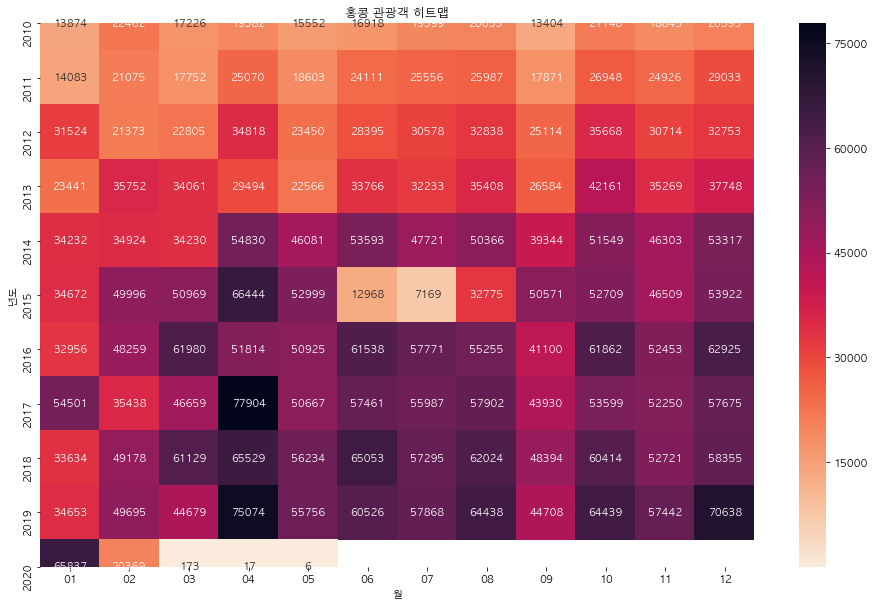

In [79]:
for cntry in cntry_list:
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    df_pivot = df_filter.pivot_table(values='관광', index='년도', columns='월')
    
    plt.figure(figsize=(16,10))
    
    sns.heatmap(df_pivot, annot= True, fmt='.0f', cmap='rocket_r')

    plt.title('{} 관광객 히트맵'.format(cntry))

    plt.show()

# 5. 가장 뜨는 제주도 핫플레이스는 어디일까?

### 5.1 인스타그램 크롤링

In [1]:
from selenium import webdriver
driver = webdriver.Chrome('./chromedriver')

In [2]:
import time
driver.get('https://www.instagram.com/')
time.sleep(2)

In [3]:
# 계정 정보 입력 > 로그인
# email = ''
# imput_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
# input_id.clear()
# input_id.send_keys(email)

# password = ''
# input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
# input_pw.clear()
# input_pw.send_keys(password)
# input_pw.submit()
# time.sleep(3)

In [4]:
# 인스타그램 검색 URL 만들기
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

In [32]:
word = '제주여행'
url = insta_searching(word)
driver.get(url)
time.sleep(3)

In [33]:
# 첫번째 게시글 열기
def select_first(driver):
    first = driver.find_element_by_css_selector('div._9AhH0')
    first.click()
    time.sleep(3)

select_first(driver)

In [34]:
import re # 정규표현식에 사용되는 라이브러리 
from bs4 import BeautifulSoup
import unicodedata

#게시물 가져오기
def get_content(driver):
    # 1. 현재 페이지의 HTML 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # 2. 본문 내용 가져오기
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content) # MacOS에서 작성된 글의 경우, 한글 자음/모음 분리되는 현상이 있어서 자음/모음을 합쳐서 한글을 처리하는(NFC방식) 코드
    except:
        content = ' '
    
    # 3. 본문 내용에서 해시태그 가져오기
    tags = re.findall(r'#[^\s#,\\]+', content)
    
    # 4. 작성일자 정보 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    
    # 5. 좋아요 수 가져오기
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1] # 좋아요 xx개 형태에서 숫자만 가져오기
    except:
        like = 0
    
    # 6. 위치정보 가져오기
    try:
        place = soup.select('div.M30cS')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
    
    # 7. 수집한 정보 저장
    data = [content, date, like, place, tags]
    return data

In [35]:
get_content(driver)

['청량한 바다 조-하( ๑˃̶ ꇴ ˂̶)♪⁺ #제주도 #월정리',
 '2021-08-26',
 0,
 'Jeju',
 ['#제주도', '#월정리']]

In [36]:
# 다음 페이지로 이동하기
def move_next(driver):
    right = driver.find_element_by_css_selector('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)

move_next(driver)

In [37]:
results = []
target = 50 # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생 시 (네트워크 문제 등) 2초 대기후 다음 게시글 넘어가도록 try-catch
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)

print(results[:2])

[['나도 왔D👅', '2021-08-26', 0, '디앤디파트먼트 제주', []], ['(광고)제주도여행중 기억에 남는 맛집‼️망고아이스크림 완전👍망고쥬스 말이 필요없음...3개 포장해서 숙소왔어요!!망고 파는곳은 많은데 여기가 진짜다꼭드세요😍(동물진짜 많아서 동물좋아하는사람 강추)당나귀.토끼.거북이.고양이.강아지.닭.미니돼지.고슴도치#제주카페#제주도카페 #제주도맛집 #제주맛집 #제주카페추천 #제주도카페추천 #제주도맛집추천 #제주맛집추천 #제주도민맛집 #오설록맛집 #제주시카페 #협재카페 #애월맛집 #애월카페 #제주여행 #제주도여행 #제주가볼만한곳 #제주도가볼만한곳', '2021-08-27', 0, '', ['#제주카페', '#제주도카페', '#제주도맛집', '#제주맛집', '#제주카페추천', '#제주도카페추천', '#제주도맛집추천', '#제주맛집추천', '#제주도민맛집', '#오설록맛집', '#제주시카페', '#협재카페', '#애월맛집', '#애월카페', '#제주여행', '#제주도여행', '#제주가볼만한곳', '#제주도가볼만한곳']]]


In [38]:
import pandas as pd
# 크롤링 결과 저장
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']
results_df.to_excel('./datasalon-master/02_개정판/5_Jeju_Hotplace/practice/1_crawling_jejuYeoHaeng.xlsx', index=False)

In [40]:
jeju_insta_df = pd.DataFrame([])

folder = './datasalon-master/02_개정판/5_Jeju_Hotplace/practice/'
f_list = ['1_crawling_jejudoMatJip.xlsx', '1_crawling_jejudoGwanGwang.xlsx', '1_crawling_jejuMatJip.xlsx', '1_crawling_jejuYeoHaeng.xlsx']

for name in f_list:
    fpath = folder + name
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)

jeju_insta_df.columns = ['content', 'date', 'like', 'place', 'tags']

In [41]:
# 중복데이터 제거 후 저장
jeju_insta_df.drop_duplicates(subset=['content'], inplace=True)
jeju_insta_df.to_excel('./datasalon-master/02_개정판/5_Jeju_Hotplace/practice/1_crawling_raw.xlsx', index=False)

In [42]:
raw_total = pd.read_excel('./datasalon-master/02_개정판/5_Jeju_Hotplace/practice/1_crawling_raw.xlsx')
raw_total['tags'][:3]

0    ['#범일분식', '#범일분식>⠀제주도', '#범일분식', '#제주미담', '#범일...
1                ['#애월맛집', '#제주애월맛집', '#제주해안도로드라이브코스']
2    ['#섭지코지한끼🍱오픈', '#섭지코지맛집', '#섭지코지', '#섭지코지카페', ...
Name: tags, dtype: object

In [66]:
tags_total = []

for tags in raw_total['tags']: # 해시태그 데이터 불러오기
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [67]:
# 빈도수 집계
from collections import Counter
tags_counts = Counter(tags_total)

In [68]:
# 빈도 높은 순으로 50개 조회
tags_counts.most_common(50)

[('#제주도맛집', 239),
 ('#제주맛집', 174),
 ('', 124),
 ('#제주도여행', 106),
 ('#제주도', 95),
 ('#제주여행', 92),
 ('#애월맛집', 62),
 ('#제주', 59),
 ('#서귀포맛집', 50),
 ('#제주도가볼만한곳', 50),
 ('#제주카페', 46),
 ('#제주공항맛집', 40),
 ('#제주핫플', 37),
 ('#제주공항근처맛집', 36),
 ('#제주도민맛집', 34),
 ('#먹스타그램', 34),
 ('#제주도카페', 33),
 ('#제주시맛집', 33),
 ('#제주살이', 32),
 ('#제주가볼만한곳', 31),
 ('#한림맛집', 30),
 ('#제주맛집추천', 29),
 ('#중문맛집', 28),
 ('#제주도관광', 28),
 ('#제주도맛집추천', 27),
 ('#맛스타그램', 22),
 ('#협재맛집', 21),
 ('#애월카페', 20),
 ('#제주일상', 20),
 ('#제주라이프', 20),
 ('#제주애월맛집', 19),
 ('#jeju', 19),
 ('#산방산맛집', 18),
 ('#제주도민', 18),
 ('#월정리맛집', 17),
 ('#맛집', 17),
 ('#맛집추천', 17),
 ('#좋아요반사', 16),
 ('#좋반', 16),
 ('#제주도핫플', 16),
 ('#곽지맛집', 16),
 ('#제주현지인맛집', 15),
 ('#제주카페추천', 15),
 ('#새별오름', 14),
 ('#맞팔', 14),
 ('#성산맛집', 13),
 ('#일상', 13),
 ('#소통', 13),
 ('#먹팔', 13),
 ('#제주중문맛집', 13)]

In [72]:
# 주제와 무관한 해시태그 제외 
STOPWORDS = ['\'\'', '#먹스타그램', '#제주', '#제주도', '#맛스타그램', '#제주일상', '#제주라이프', '#jeju', '#맛집', '#좋아요반사', '#맛집추천', '#좋반', '#새별오름', '#맞팔', '#일상', '#소통', '#먹팔', '#좋아요']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag) 

tag_total_selected = Counter(tag_total_selected)
tag_total_selected.most_common(50)

[('#제주도맛집', 239),
 ('#제주맛집', 174),
 ('', 124),
 ('#제주도여행', 106),
 ('#제주여행', 92),
 ('#애월맛집', 62),
 ('#서귀포맛집', 50),
 ('#제주도가볼만한곳', 50),
 ('#제주카페', 46),
 ('#제주공항맛집', 40),
 ('#제주핫플', 37),
 ('#제주공항근처맛집', 36),
 ('#제주도민맛집', 34),
 ('#제주도카페', 33),
 ('#제주시맛집', 33),
 ('#제주살이', 32),
 ('#제주가볼만한곳', 31),
 ('#한림맛집', 30),
 ('#제주맛집추천', 29),
 ('#중문맛집', 28),
 ('#제주도관광', 28),
 ('#제주도맛집추천', 27),
 ('#협재맛집', 21),
 ('#애월카페', 20),
 ('#제주애월맛집', 19),
 ('#산방산맛집', 18),
 ('#제주도민', 18),
 ('#월정리맛집', 17),
 ('#제주도핫플', 16),
 ('#곽지맛집', 16),
 ('#제주현지인맛집', 15),
 ('#제주카페추천', 15),
 ('#성산맛집', 13),
 ('#제주중문맛집', 13),
 ('#하귀맛집', 12),
 ('#외도맛집', 12),
 ('#연동제주분식', 12),
 ('#함덕맛집', 12),
 ('#제주핫플레이스', 12),
 ('#제주도술집', 12),
 ('#제주술집', 11),
 ('#성산일출봉맛집', 11),
 ('#애월가볼만한곳', 11),
 ('#협재해수욕장맛집', 11),
 ('#신제주맛집', 11),
 ('#협재해수욕장', 11),
 ('#제주흑돼지', 10),
 ('#제주갈치조림', 10),
 ('#제주협재맛집', 10),
 ('#애월읍맛집', 9)]

In [61]:
# 시각화 라이브러리 임포트 및 글꼴 설정
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ['win32', 'win64']:
    font_name = 'malgun gothic'
elif sys.platform == 'darwin':
    font_name = 'AppleGothic'

rc('font', family=font_name)

In [62]:
tag_counts_df = pd.DataFrame(tag_total_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

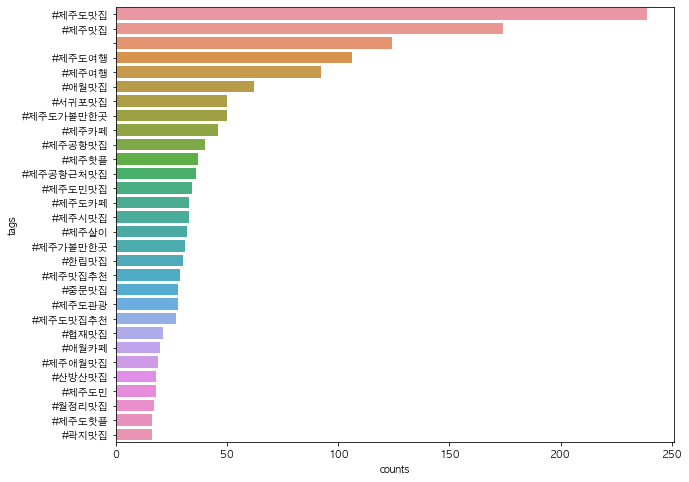

In [63]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df) # 막대차트 그리기

### 5.2 워드클라우드

In [146]:
# ! pip install wordcloud # wordcloud import 안되는 경우

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
ERROR: wordcloud-1.8.1-cp37-cp37m-win_amd64.whl is not a supported wheel on this platform.


In [147]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':
    font_path = 'C:/Windows/Fonts/malgun.ttf'
elif platform.system() == 'Darwin':
    font_path = '/Users/hailey/Library/Fonts/AppleGothic.ttf'

ModuleNotFoundError: No module named 'wordcloud'

In [148]:
# 워드클라우드 만들기
wordcloud = WordCloud(font_path = font_path, background_color = 'white', max_words = 100,
                     relative_scaling = 0.3, width = 800, height = 400).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./datasalon-master/02_개정판/5_Jeju_Hotplace/practice/2_tag-wordcloud.png')

NameError: name 'WordCloud' is not defined

### 5.3 지도시각화

In [149]:
raw_total = pd.read_excel('./datasalon-master/02_개정판/5_Jeju_Hotplace/practice/1_crawling_raw.xlsx')
raw_total.head()

,content,date,like,place,tags
0,📍제주도_남원✅ #범일분식 / 순대백반하트점수 : ♥️♥️♥️♥️♥️🖤🖤⠀<순대백반...,2021-08-26,0.0,범일분식,"['#범일분식', '#범일분식>⠀제주도', '#범일분식', '#제주미담', '#범일..."
1,(협찬)너무맛있었던 파스토가장유명한 최애 “토마호크”19900원 가성비 값🥰하루에 ...,2021-08-27,0.0,NaN,"['#애월맛집', '#제주애월맛집', '#제주해안도로드라이브코스']"
2,<광고>섭지코지에서 한끼 맛있게 드시고 싶다면...특히 점심메뉴로 강력추천드리고요 ...,2021-08-26,0.0,NaN,"['#섭지코지한끼🍱오픈', '#섭지코지맛집', '#섭지코지', '#섭지코지카페', ..."
3,"예쁜사진 감사드립니다^^@roro_s2_ @g0ld___ink 제주애월맛집 ""랍스터...",2021-08-27,0.0,NaN,"['#애월맛집', '#애월카페', '#애월읍맛집', '#제주애월맛집', '#제주도맛..."
4,<광고>제주갈비국수가 유명한 맛집!!손님들을 위해 끝까지 최선을 다해 드실수 있도록...,2021-08-26,0.0,NaN,"['#산도롱맨도롱▪️오픈시간:', '#성산일출봉맛집', '#성산아침식사', '#성산..."


In [150]:
location_counts = raw_total['place'].value_counts() # 위치 정보별 빈도수
location_counts

환상의 섬 Jeju Island    9
제주도 Jeju Island      9
고래배꼽                 8
Jeju                 7
Jeju-do              6
                    ..
하도해변                 1
목화휴게소                1
논짓물식당                1
동명동                  1
구좌지앵                 1
Name: place, Length: 169, dtype: int64

In [151]:
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
환상의 섬 Jeju Island,9
제주도 Jeju Island,9
고래배꼽,8
Jeju,7
Jeju-do,6


In [152]:
location_counts_df.to_excel('./datasalon-master/02_개정판/5_Jeju_Hotplace/practice/3_3_location_counts.xlsx')

In [153]:
locations = list(location_counts.index) # 위치 정보만
locations

['환상의 섬 Jeju Island',
 '제주도 Jeju Island',
 '고래배꼽',
 'Jeju',
 'Jeju-do',
 '다운타우너 제주 애월 - Downtowner Jeju Aewol',
 '제주 사계해변',
 'Seogwipo',
 '스누피가든',
 '신창풍차해안도로',
 '디앤디파트먼트 제주',
 'Seogwipo, Jeju Island, South Korea',
 '제주도 서귀포시 중문단지',
 '제주 남원리',
 '제주도 애월읍',
 '그레이그로브',
 '제주도 곽지해수욕장',
 '곰막 횟집',
 '그때그집',
 '해더',
 '노라바',
 'the cliff jeju - 더클리프 제주',
 '월정리해변',
 '인스밀',
 '송훈파크',
 '제주시차',
 '협재',
 '법환동',
 '우도 牛岛 Udo Island, South Korea',
 '아녜스의앞치마',
 '부영 CC',
 '와인공화국',
 '화산2020',
 '그랜드하얏트 제주',
 '토끼트멍',
 '도두반점',
 '오지하우스:호주식당',
 '털보네장어랜드',
 '제주도 삼대국수',
 'CAFE COLA Coffee&coke',
 '카페갤럭시아 제주',
 '보롬왓',
 '랍스터빈_jeju',
 '도치돌목장',
 '노모어블루스',
 '공항칼국수',
 '천호역',
 '제주도 하도리',
 "라이터스블럭/ writer's block",
 '바다위에코끼리',
 '문쏘',
 '성산일출봉',
 '오후새우시',
 '제주 구좌 행원',
 '취향의섬',
 '한촌설렁탕',
 '하도어촌계',
 '신화역사공원',
 'Holiday Diving Korea',
 '바람이풀에그림그린날',
 '숙성도',
 '물영아리 오름습지',
 '잇칸시타',
 '론푸드차이나',
 '제주 해비치호텔',
 '범일분식',
 '미스제주가든',
 'Saturday Island',
 '마담나탈리소셜클럽',
 'Kunaeats, 쿠나이츠',
 '구엄해녀수산',
 '제주김녕해수욕장',
 'Hidden Cliff / 히든 클리프',
 '볕이드는

In [157]:
# 카카오 API를 활용한 장소 검색
import requests

searching = '양재 스타벅스'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)

headers = {
    "Authorization": 'KakaoAK d46d78ea8d2f9c38f9281125941f0229'
}

places = requests.get(url, headers = headers).json()['documents']
places

[{'address_name': '서울 서초구 양재동 14-4',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '25985341',
  'phone': '1522-3232',
  'place_name': '스타벅스 양재역점',
  'place_url': 'http://place.map.kakao.com/25985341',
  'road_address_name': '서울 서초구 강남대로 202',
  'x': '127.036849465801',
  'y': '37.4822865420713'},
 {'address_name': '서울 서초구 양재동 215',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '7962297',
  'phone': '1522-3232',
  'place_name': '스타벅스 하이브랜드점',
  'place_url': 'http://place.map.kakao.com/7962297',
  'road_address_name': '서울 서초구 매헌로 16',
  'x': '127.036686081344',
  'y': '37.4626085281858'},
 {'address_name': '서울 서초구 양재동 4-3',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '7975002',
  'phone': '',
  'place_name': '스타벅스 영동2교점',


In [158]:
def find_places(searching):
    # 1. 접속 URL 만들기
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    
    # 2. headers 입력
    headers = {
        "Authorization": 'KakaoAK d46d78ea8d2f9c38f9281125941f0229'
    }
    
    # 3. API 요청 및 받기 
    places = requests.get(url, headers = headers).json()['documents']
    
    # 4. 필요한 정보 선택
    place = places[0]
    name = place['place_name']
    x = place['x']
    y = place['y']
    data = [name, x, y, searching]
    
    return data

In [ ]:
!pip install tqdm

In [ ]:
import tqdm

locations_inform = []
for location in tqdm(locations):
    try:
        data = find_places(location)
        locations_inform.append(data)
        time.sleep(0.5)
    except:
        pass
locations_inform

In [ ]:
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['네이버위치명', '경도', '위도', '인스타위치명']
locations_inform_df.to_excel('./datasalon-master/02_개정판/5_Jeju_Hotplace/practice/3_3_locations.xlsx', index = False)

In [ ]:
location_counts_df = pd.read_excel